# Data Visualization and EDA

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Univariate Visualization

In [ ]:
# Load a sample dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

### Count plot

<Axes: xlabel='day', ylabel='count'>

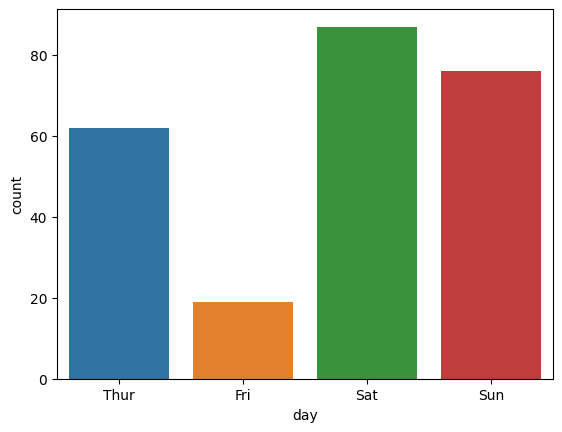

In [ ]:
# Create a bar plot
sns.countplot(data=tips, x="day")

### Kernel density plot

<Axes: xlabel='total_bill', ylabel='Density'>

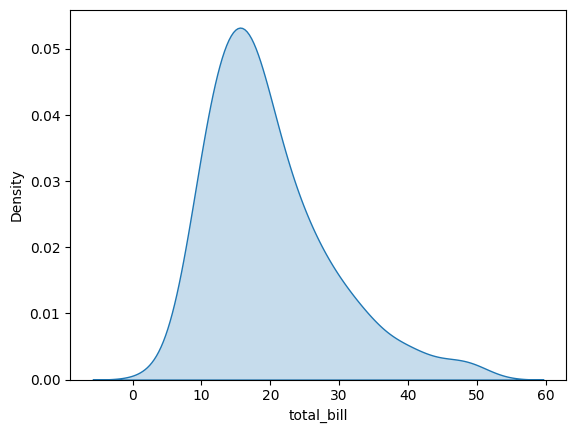

In [ ]:
sns.kdeplot(data=tips, x="total_bill", fill=True)

<Axes: xlabel='tip', ylabel='Density'>

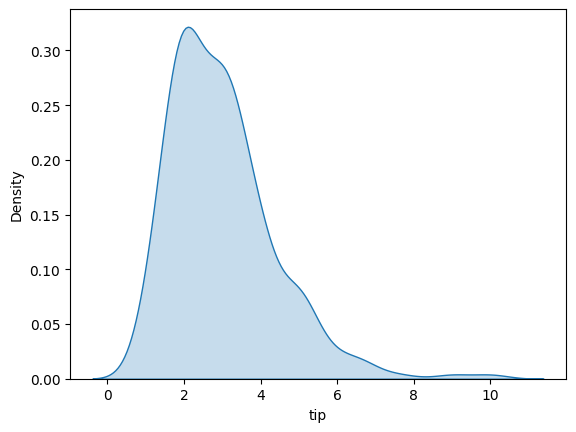

In [ ]:
sns.kdeplot(data=tips, x="tip", fill=True)

### Boxplot

<Axes: xlabel='tip'>

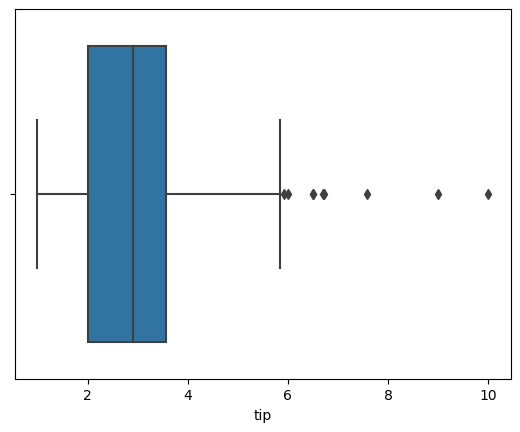

In [ ]:
sns.boxplot(data=tips, x="tip")

## Bivariate Visualization

### Scatter plot

<Axes: xlabel='total_bill', ylabel='tip'>

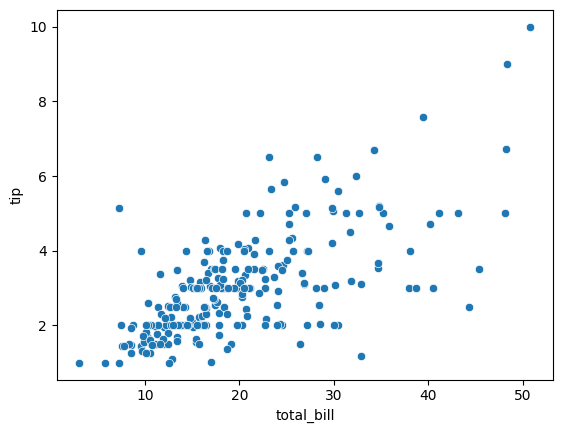

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

### Line plot

In [ ]:
df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', end='2023-01-31', freq='D'),
    'visitor': [10, 15, 12, 8, 6, 9, 11, 14, 16, 18, 13, 7, 5, 9, 12, 15, 19, 16, 12, 10, 8, 14, 17, 20, 15, 11, 9, 7, 13, 16, 18]
})

df.head()

,date,visitor
0,2023-01-01,10
1,2023-01-02,15
2,2023-01-03,12
3,2023-01-04,8
4,2023-01-05,6


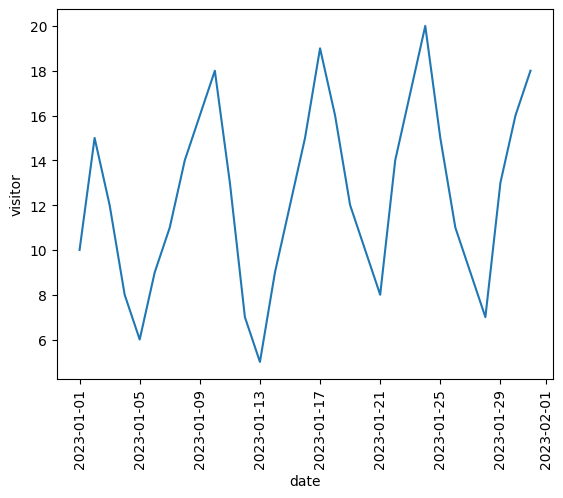

In [ ]:
sns.lineplot(data=df, x="date", y="visitor")
plt.xticks(rotation = 90)
plt.show()

### Countplot with hue

In [ ]:
admission = pd.read_csv("/content/drive/MyDrive/DQlab/Tetris/Sesi 3 - Data Visualization/admission_data.csv")
admission.head()

,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
0,337.0,118.0,4.5,4.5,9.65,yes,yes,low
1,324.0,107.0,4.0,4.5,8.87,yes,yes,low
2,316.0,104.0,3.0,3.5,8.00,yes,yes,high
3,322.0,110.0,3.5,2.5,8.67,yes,yes,high
4,314.0,103.0,2.0,3.0,8.21,no,no,high


<Axes: xlabel='research_exp', ylabel='count'>

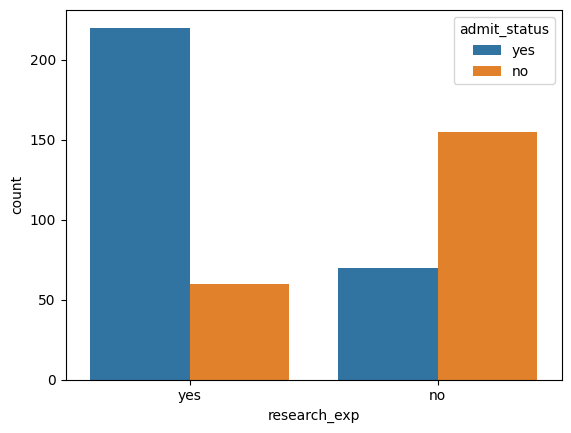

In [ ]:
sns.countplot(data=admission, x="research_exp", hue="admit_status")

<ipython-input-38-b2ff69c5a4a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = admission.corr()


<Axes: >

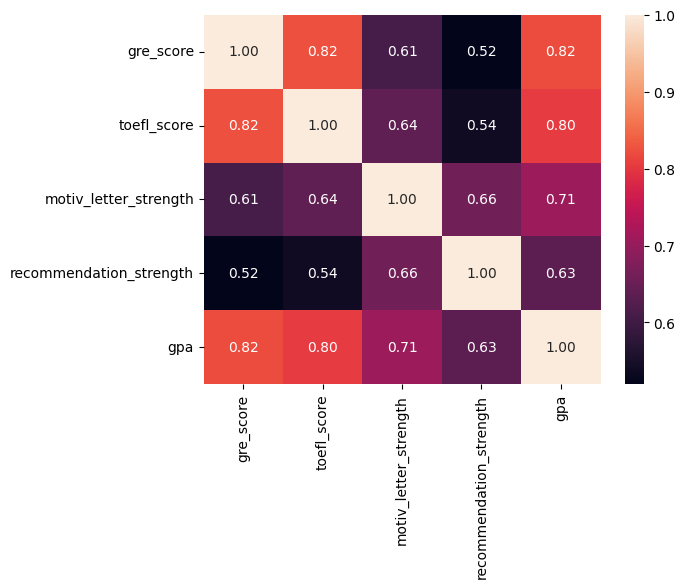

In [ ]:
correlation = admission.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

## EDA

### Data Admission

In [ ]:
# cuplikan data
admission.head()

,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
0,337.0,118.0,4.5,4.5,9.65,yes,yes,low
1,324.0,107.0,4.0,4.5,8.87,yes,yes,low
2,316.0,104.0,3.0,3.5,8.00,yes,yes,high
3,322.0,110.0,3.5,2.5,8.67,yes,yes,high
4,314.0,103.0,2.0,3.0,8.21,no,no,high


In [ ]:
# informasi general
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   motiv_letter_strength    503 non-null    float64
 3   recommendation_strength  499 non-null    float64
 4   gpa                      501 non-null    float64
 5   research_exp             505 non-null    object 
 6   admit_status             505 non-null    object 
 7   univ_tier                505 non-null    object 
dtypes: float64(5), object(3)
memory usage: 31.7+ KB


Pengamatan:
1. Dataset memiliki 8 kolom, dengan ukuran 505 baris
2. 5 kolom numerik, 3 kolom kategorik
3. Ada beberapa kolom yang memiliki missing values

In [ ]:
# pembagian jenis kolom
numerik = ["gre_score","toefl_score","motiv_letter_strength","recommendation_strength","gpa"]
kategorik = ["research_exp","admit_status","univ_tier"]

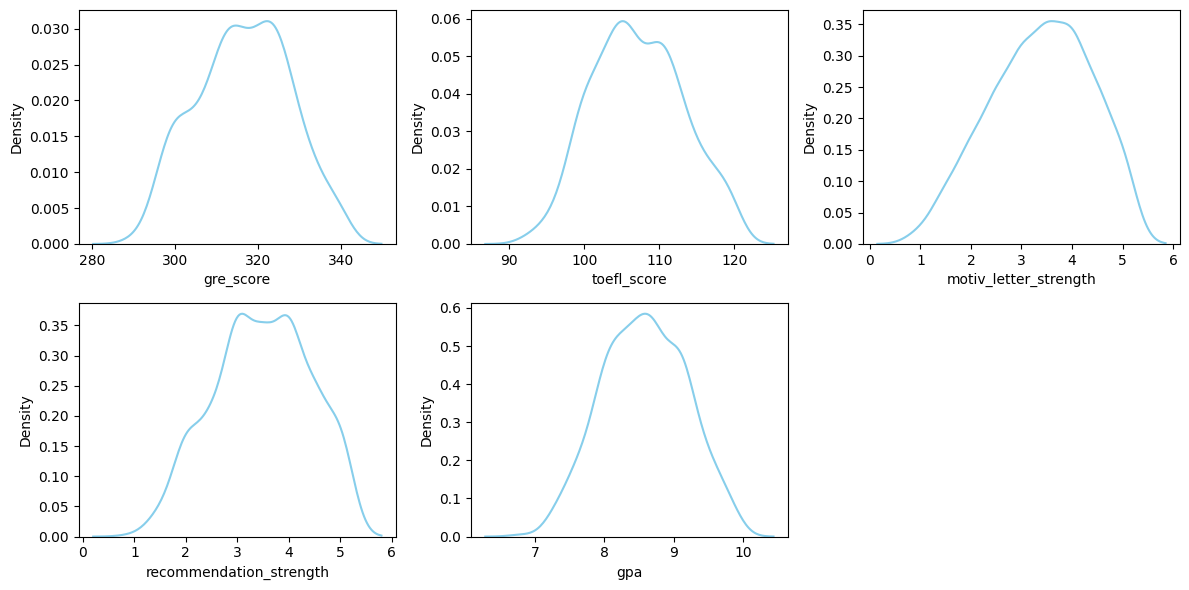

In [ ]:
# density plot untuk kolom kolom numerik
plt.figure(figsize=(12,6))

features = numerik
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=admission[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:
1. Dapat diketahui nilai tipikal untuk masing-masing kolom (puncak distribusi plot)
2. Bentuk distribusi kolom numerik cukup simetris

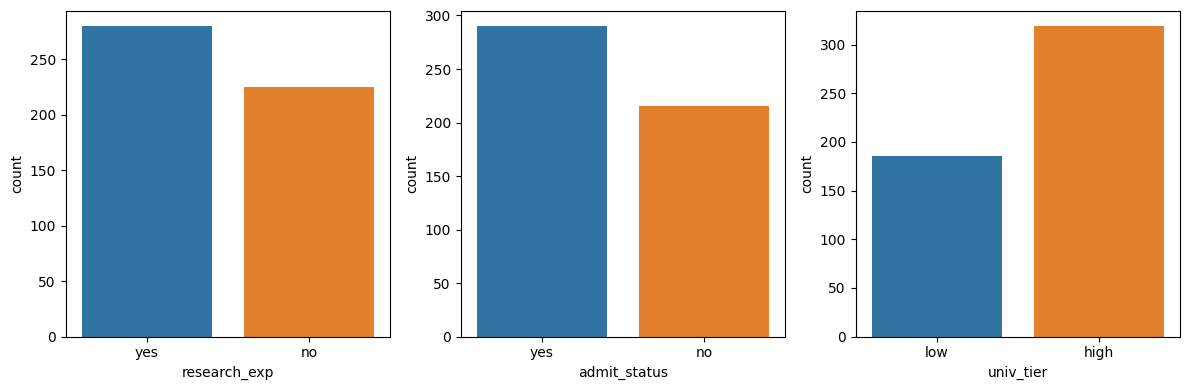

In [ ]:
# countplot untuk kolom-kolom kategorik
plt.figure(figsize=(12,4))

features = kategorik
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=admission[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:
1. Mayoritas siswa memiliki pengalaman riset, diterima, dan mendaftar pada universitas top (high tier)

<Axes: xlabel='research_exp', ylabel='count'>

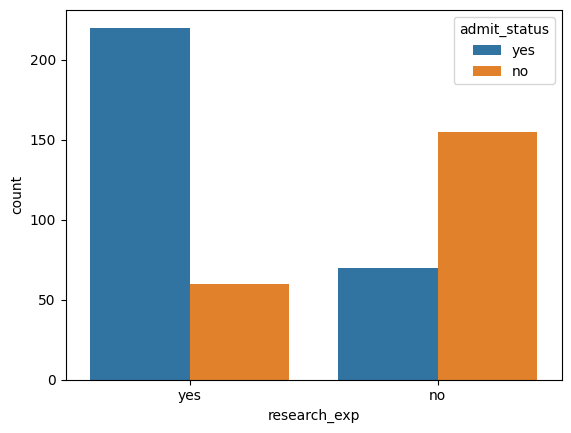

In [ ]:
# countplot with hue
# evaluasi hubungan variabel research_experience dengan admit_status
sns.countplot(data=admission, x='research_exp', hue='admit_status')

Insight: research experience membantu meningkatkan peluang diterima di universitas

<Axes: xlabel='univ_tier', ylabel='count'>

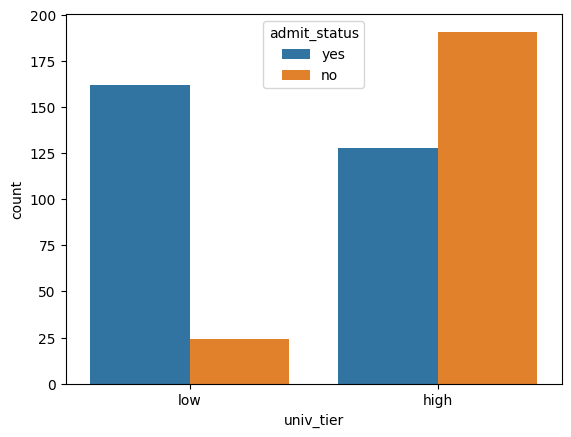

In [ ]:
# countplot with hue
# evaluasi hubungan variabel univ_tier dengan admit_status
sns.countplot(data=admission, x='univ_tier', hue='admit_status')

Insight: siswa yang mendaftar di universitas top lebih banyak yang ditolak

<ipython-input-49-8ea2fa7d790b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = admission.corr()


<Axes: >

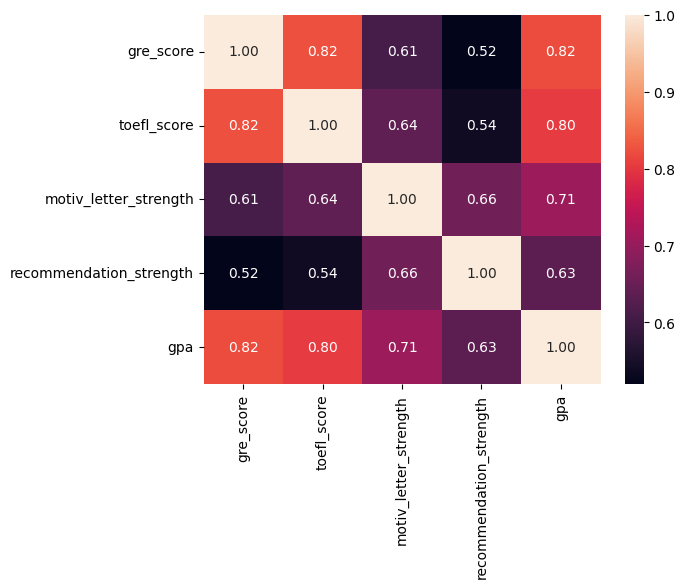

In [ ]:
# correlation heatmap
correlation = admission.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

### MPG dataset

In [ ]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: xlabel='origin', ylabel='count'>

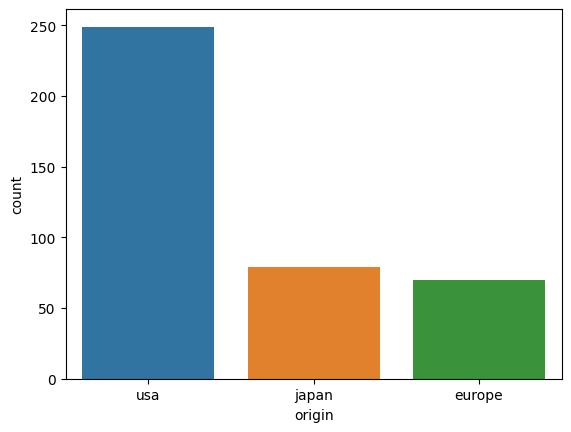

In [ ]:
# berapa banyak mobil dari masing-masing negara origin?
sns.countplot(data=mpg, x='origin')

<ipython-input-50-0ee5eb5110fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mpg.corr()


<Axes: >

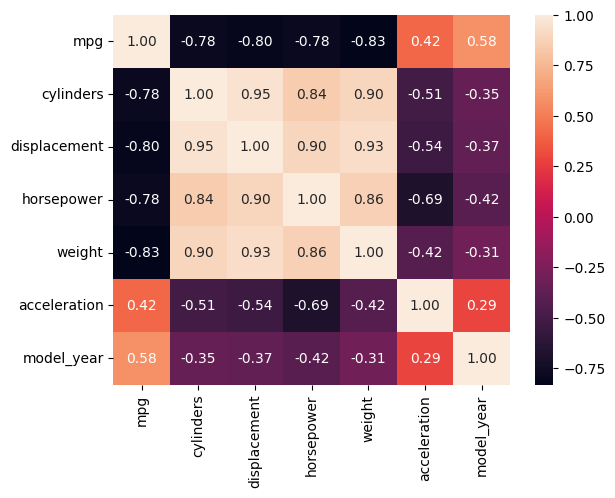

In [ ]:
# bagaimana korelasi antar variabel yang numerik?
correlation = mpg.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")